# Resource Allocation Project
## Prateek Goel - Analyst, Data Science - 010242

#### *Dataset:* The dataset comprises of two spreadsheets having different metrics including GWP, SWP, SCR coverage ration etc.

## Task I

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import zscore
from tabulate import tabulate
warnings.filterwarnings('ignore')

In [2]:
# Import dataset 1
filename = "(PRA)_(OFFG)_8350731_v_1_010242 - Analyst Data Science - Technical Assessment - Data.XLSX"
df = pd.read_excel(filename,header=[0,1])
df.head()

Unnamed: 0_level_0     NWP (£m)                                             \
  Unnamed: 0_level_1        2016YE        2017YE        2018YE        2019YE   
0             Firm 1 -17754.100486      0.000000      0.000000      0.000000   
1             Firm 2      9.244369      0.098771     40.812426     35.643071   
2             Firm 3      0.000000      0.806130     36.620199     86.630018   
3             Firm 4  19677.453353  41072.816156  20885.506445  14719.672914   
4             Firm 5    128.812208     10.407371     79.579663     79.423623   

                     SCR (£m)                                            ...  \
         2020YE        2016YE        2017YE        2018YE        2019YE  ...   
0      0.000000   2021.321862  6.940043e-09      0.000000      0.000000  ...   
1     13.626145     16.459756  1.500907e+01     14.227214     15.037066  ...   
2     54.744180    486.887796  4.957863e+02    626.612217     81.242579  ...   
3  49204.465136  15975.652771  1.536789e+04  10797.123319  22788.359468  ...   
4     61.727295     32.742279  4.395404e+01     31.622572     30.119285  ...   

  Total liabilities (£m)                                            \
                  2016YE        2017YE        2018YE        2019YE   
0           40171.683156      0.000000      0.000000      0.000000   
1               7.970519     12.796789     11.332857      6.730190   
2              68.000844   1592.310597   1005.328927    593.689101   
3           48416.743356  30870.226541  68145.069079  92600.140108   
4             267.458967     22.979292     69.343245     16.837470   

                Excess of assets over liabilities (£m) [= equity]  \
         2020YE                                            2016YE   
0      0.000000                                       1243.924991   
1     16.173862                                          8.755261   
2    374.712155                                        210.918808   
3  92273.053968                                      24862.167211   
4    106.179543                                        262.683530   

                                                          
        2017YE        2018YE        2019YE        2020YE  
0     4.398725      0.000000      0.000000      0.000000  
1    48.425189      0.070823     43.368380     12.456319  
2   100.776891     87.586067    922.487659    412.466207  
3  7191.961836  12910.346383  12586.973993  24127.839035  
4     7.592281     96.945192    104.609768    103.180972  

[5 rows x 41 columns]

In [3]:
# combined the column name signifying year wise metrics
df.columns = [' '.join(col).strip() for col in df.columns.values]
df.head()

,Unnamed: 0_level_0 Unnamed: 0_level_1,NWP (£m) 2016YE,NWP (£m) 2017YE,NWP (£m) 2018YE,NWP (£m) 2019YE,NWP (£m) 2020YE,SCR (£m) 2016YE,SCR (£m) 2017YE,SCR (£m) 2018YE,SCR (£m) 2019YE,...,Total liabilities (£m) 2016YE,Total liabilities (£m) 2017YE,Total liabilities (£m) 2018YE,Total liabilities (£m) 2019YE,Total liabilities (£m) 2020YE,Excess of assets over liabilities (£m) [= equity] 2016YE,Excess of assets over liabilities (£m) [= equity] 2017YE,Excess of assets over liabilities (£m) [= equity] 2018YE,Excess of assets over liabilities (£m) [= equity] 2019YE,Excess of assets over liabilities (£m) [= equity] 2020YE
0,Firm 1,-17754.100486,0.000000,0.000000,0.000000,0.000000,2021.321862,6.940043e-09,0.000000,0.000000,...,40171.683156,0.000000,0.000000,0.000000,0.000000,1243.924991,4.398725,0.000000,0.000000,0.000000
1,Firm 2,9.244369,0.098771,40.812426,35.643071,13.626145,16.459756,1.500907e+01,14.227214,15.037066,...,7.970519,12.796789,11.332857,6.730190,16.173862,8.755261,48.425189,0.070823,43.368380,12.456319
2,Firm 3,0.000000,0.806130,36.620199,86.630018,54.744180,486.887796,4.957863e+02,626.612217,81.242579,...,68.000844,1592.310597,1005.328927,593.689101,374.712155,210.918808,100.776891,87.586067,922.487659,412.466207
3,Firm 4,19677.453353,41072.816156,20885.506445,14719.672914,49204.465136,15975.652771,1.536789e+04,10797.123319,22788.359468,...,48416.743356,30870.226541,68145.069079,92600.140108,92273.053968,24862.167211,7191.961836,12910.346383,12586.973993,24127.839035
4,Firm 5,128.812208,10.407371,79.579663,79.423623,61.727295,32.742279,4.395404e+01,31.622572,30.119285,...,267.458967,22.979292,69.343245,16.837470,106.179543,262.683530,7.592281,96.945192,104.609768,103.180972


In [4]:
# Import dataset 2
df1 = pd.read_excel(filename, sheet_name="Dataset 2 - Underwriting",header=[0,1])
df1.columns = [' '.join(col).strip() for col in df1.columns.values]
df1.head()

,Unnamed: 0_level_0 Unnamed: 0_level_1,Gross claims incurred (£m) 2016YE,Gross claims incurred (£m) 2017YE,Gross claims incurred (£m) 2018YE,Gross claims incurred (£m) 2019YE,Gross claims incurred (£m) 2020YE,"Gross BEL (inc. TPs as whole, pre-TMTP) (£m) 2016YE","Gross BEL (inc. TPs as whole, pre-TMTP) (£m) 2017YE","Gross BEL (inc. TPs as whole, pre-TMTP) (£m) 2018YE","Gross BEL (inc. TPs as whole, pre-TMTP) (£m) 2019YE",...,Gross expense ratio 2016YE,Gross expense ratio 2017YE,Gross expense ratio 2018YE,Gross expense ratio 2019YE,Gross expense ratio 2020YE,Gross combined ratio 2016YE,Gross combined ratio 2017YE,Gross combined ratio 2018YE,Gross combined ratio 2019YE,Gross combined ratio 2020YE
0,Firm 1,0.000000,0.005515,0.000000,0.000000,0.000000,0.000000,0.588994,0.000000,0.000000,...,0.000000,77.251254,0.000000,0.000000,0.000000,0.000000,0.675051,0.000000,0.000000,0.000000
1,Firm 2,44.467865,29.489599,34.100482,0.000000,0.000000,221.327680,59.474691,266.118414,0.000000,...,0.391179,0.685941,1.433284,0.000000,0.000000,1.750946,1.321523,1.545325,0.000000,0.000000
2,Firm 3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Firm 4,14.340938,71.062447,87.912471,42.280402,3.668494,-35.112768,7.848685,100.876270,167.959536,...,0.231139,0.285471,0.054150,0.051848,-0.162883,1.047234,0.476384,3.307379,1.247403,-2.303093
4,Firm 5,48.738606,425.748869,691.379669,174.101260,5.927624,8.386701,253.149414,587.461209,226.977435,...,0.236128,0.232725,0.204508,0.131739,0.048703,0.243611,1.977732,2.495287,0.365455,1.133645


In [5]:
# combined the column name signifying year wise metrics
data = pd.merge(df,df1,on='Unnamed: 0_level_0 Unnamed: 0_level_1',how='inner')
data = data.rename(columns={'Unnamed: 0_level_0 Unnamed: 0_level_1':'Firm'}) # renamed the column name
# data.replace(0,1e-10,inplace = True)
data.head()

,Firm,NWP (£m) 2016YE,NWP (£m) 2017YE,NWP (£m) 2018YE,NWP (£m) 2019YE,NWP (£m) 2020YE,SCR (£m) 2016YE,SCR (£m) 2017YE,SCR (£m) 2018YE,SCR (£m) 2019YE,...,Gross expense ratio 2016YE,Gross expense ratio 2017YE,Gross expense ratio 2018YE,Gross expense ratio 2019YE,Gross expense ratio 2020YE,Gross combined ratio 2016YE,Gross combined ratio 2017YE,Gross combined ratio 2018YE,Gross combined ratio 2019YE,Gross combined ratio 2020YE
0,Firm 1,-17754.100486,0.000000,0.000000,0.000000,0.000000,2021.321862,6.940043e-09,0.000000,0.000000,...,0.000000,77.251254,0.000000,0.000000,0.000000,0.000000,0.675051,0.000000,0.000000,0.000000
1,Firm 2,9.244369,0.098771,40.812426,35.643071,13.626145,16.459756,1.500907e+01,14.227214,15.037066,...,0.391179,0.685941,1.433284,0.000000,0.000000,1.750946,1.321523,1.545325,0.000000,0.000000
2,Firm 3,0.000000,0.806130,36.620199,86.630018,54.744180,486.887796,4.957863e+02,626.612217,81.242579,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Firm 4,19677.453353,41072.816156,20885.506445,14719.672914,49204.465136,15975.652771,1.536789e+04,10797.123319,22788.359468,...,0.231139,0.285471,0.054150,0.051848,-0.162883,1.047234,0.476384,3.307379,1.247403,-2.303093
4,Firm 5,128.812208,10.407371,79.579663,79.423623,61.727295,32.742279,4.395404e+01,31.622572,30.119285,...,0.236128,0.232725,0.204508,0.131739,0.048703,0.243611,1.977732,2.495287,0.365455,1.133645


## **Note:** In order to check the firm size, the latest data (2020YE) has been used

### The GWP (total revenue) must be able to give an idea of which firm is big. So, based on the latest GWP data (2020), following is the analysis.

In [6]:
gwpData = data[['Firm','GWP (£m) 2020YE']]
nwpData = data[['Firm','NWP (£m)  2020YE']]

large_gwp_firms = gwpData.nlargest(10, 'GWP (£m) 2020YE')[['Firm', 'GWP (£m) 2020YE']]
large_nwp_firms = nwpData.nlargest(10, 'NWP (£m)  2020YE')[['Firm', 'NWP (£m)  2020YE']]

big_firms = pd.merge(large_gwp_firms, large_nwp_firms, on='Firm', how='outer')
big_firms
big_firms.fillna(0, inplace=True)
big_firms

,Firm,GWP (£m) 2020YE,NWP (£m) 2020YE
0,Firm 104,0.000000,6174.582162
1,Firm 151,15824.692457,0.000000
2,Firm 199,0.000000,13133.461750
3,Firm 210,69697.928286,60699.953265
4,Firm 247,9115.194999,0.000000
5,Firm 25,7031.517005,9765.612912
6,Firm 26,10352.250388,16395.671694
7,Firm 311,24251.481358,14566.280927
8,Firm 34,19274.956159,6105.500028
9,Firm 4,37761.883321,49204.465136


#### - We have the firm with the **highest GWP**, Firm 210 with approximately £69,697.93 million. 
#### - After this, comes Firm 4 and Firm 311 with £37,761.88 million and £24,251.48 million, respectively

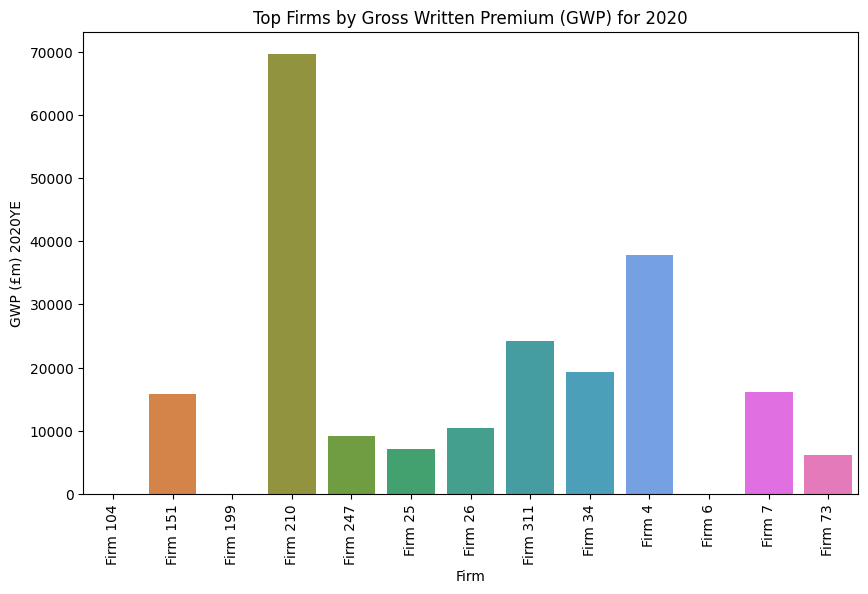

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Firm',y='GWP (£m) 2020YE',data = big_firms, hue='Firm');
plt.title("Top Firms by Gross Written Premium (GWP) for 2020")
plt.xticks(rotation=90);

#### - We have the firm with the **highest NWP**, again Firm 210 with approximately £60,699.95 million.
#### - Similary, Firm 4 is again second with a NWP of around £49,204.46 million.

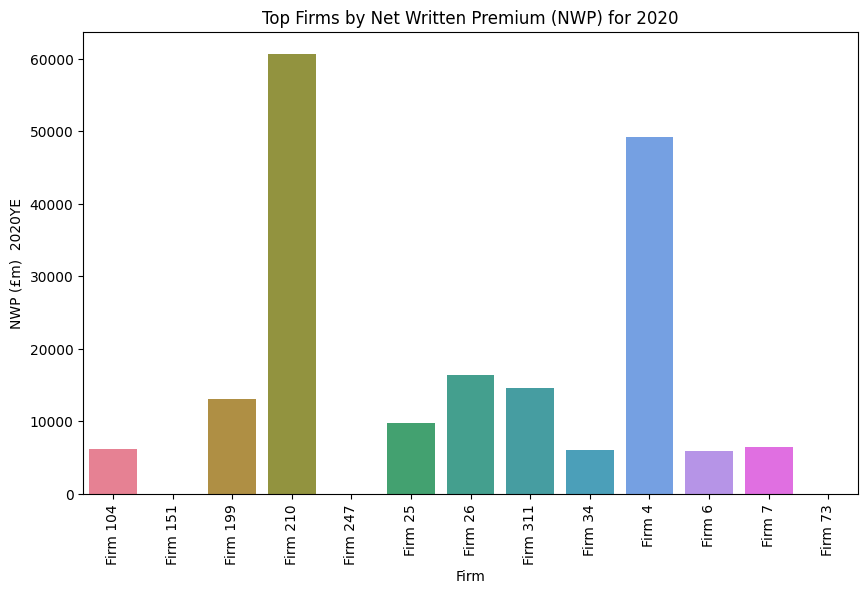

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Firm',y='NWP (£m)  2020YE',data = big_firms, hue='Firm');
plt.title("Top Firms by Net Written Premium (NWP) for 2020")
plt.xticks(rotation=90);

### Risk Passed = (NWP/GWP) will show how much of the firm’s risk is being passed on to reinsurers

In [9]:
dataCopy = data.copy()
dataCopy.replace(0,1e-10,inplace = True) # To avoid inf
for i in range(2016,2021):
    newcol = f'Risk Passed {str(i)}'
    GWPcol = f'GWP (£m) {str(i)}YE'
    NWPcol = f'NWP (£m)  {str(i)}YE'
    dataCopy[newcol] = np.round(dataCopy[NWPcol]/dataCopy[GWPcol],2)

### Highlighting firms at risk with the help of new column 'Risk Passed' and 'SCR coverage ratio'

In [10]:
price_risk_data = dataCopy[['Firm','Risk Passed 2020']]
SCR_data = data[['Firm','SCR (£m) 2020YE']]

risk_by_PriceRisk = price_risk_data.nlargest(10, 'Risk Passed 2020')[['Firm', 'Risk Passed 2020']]
risk_by_SCRratio = SCR_data[SCR_data['SCR (£m) 2020YE']<100].sort_values(by = 'SCR (£m) 2020YE',ascending = False)

#### These are the firm with high risk based on the ratio NWP/GWP

In [11]:
print(tabulate(risk_by_PriceRisk[:10], headers='keys', tablefmt='pretty', showindex="never"))

+----------+------------------+
|   Firm   | Risk Passed 2020 |
+----------+------------------+
| Firm 21  |   272592388.61   |
| Firm 76  |      56.93       |
| Firm 57  |      49.59       |
| Firm 78  |      22.52       |
| Firm 303 |      18.65       |
| Firm 201 |      17.75       |
| Firm 115 |      17.01       |
| Firm 245 |      10.18       |
| Firm 144 |       6.77       |
| Firm 230 |       6.62       |
+----------+------------------+


#### These are the firms with high risk, i.e. SCR coverage ratio less than 100 but is close to 100. There are many of these firms, which are very less than 100

#### Total Risky Firms based on SCR Coverage Ratio : **255**

In [12]:
len(risk_by_SCRratio)

255

In [13]:
print(tabulate(risk_by_SCRratio, headers='keys', tablefmt='pretty', showindex="never"))

+----------+------------------------+
|   Firm   |    SCR (£m) 2020YE     |
+----------+------------------------+
| Firm 58  |    92.3742722926863    |
|  Firm 5  |   91.51528935936774    |
| Firm 35  |   91.26703816721346    |
| Firm 70  |   89.72108650606225    |
| Firm 155 |   79.70099870459954    |
| Firm 222 |   78.87479646324047    |
| Firm 87  |    78.8083678251393    |
| Firm 313 |   76.85455045055768    |
| Firm 299 |   76.27828306531828    |
| Firm 254 |   76.13717221075964    |
| Firm 183 |   72.56743855338388    |
| Firm 100 |   70.57782428547003    |
| Firm 48  |   69.85984721165535    |
| Firm 148 |   69.01835740375836    |
| Firm 292 |   64.45601246033671    |
| Firm 212 |   59.01470261119865    |
| Firm 197 |   57.642734546344826   |
| Firm 153 |   56.548364862198916   |
| Firm 89  |   54.988794381846425   |
| Firm 263 |   54.71086346402333    |
| Firm 59  |   53.42903764758435    |
| Firm 184 |   44.814626194708126   |
| Firm 175 |   41.909414754199126   |
| Firm 180 |

### Number of firms with Changing business profile
**Note:** The threhold of percentage change have been kept to 100%

In [14]:
NWP = dataCopy[['NWP (£m)  2016YE', 'NWP (£m)  2017YE', 'NWP (£m)  2018YE','NWP (£m)  2019YE']].pct_change(axis=1).gt(100).any(axis=1).sum()

In [15]:
GWP = dataCopy[['GWP (£m) 2016YE', 'GWP (£m) 2017YE', 'GWP (£m) 2018YE','GWP (£m) 2019YE', 'GWP (£m) 2020YE']].pct_change(axis=1).gt(100).any(axis=1).sum()

In [16]:
Gross = dataCopy[['Gross claims incurred (£m) 2016YE',
       'Gross claims incurred (£m) 2017YE',
       'Gross claims incurred (£m) 2018YE',
       'Gross claims incurred (£m) 2019YE',
       'Gross claims incurred (£m) 2020YE']].pct_change(axis=1).gt(100).any(axis=1).sum()

In [17]:
ChangeDF = pd.DataFrame({'Metric':['NWP','GWP','Gross'],'Number of Firms':[NWP,GWP,Gross]})
print(tabulate(ChangeDF, headers='keys', tablefmt='pretty', showindex="never"))

+--------+-----------------+
| Metric | Number of Firms |
+--------+-----------------+
|  NWP   |       48        |
|  GWP   |       54        |
| Gross  |       45        |
+--------+-----------------+


## Outlier Detection

In [18]:
col2020 = ['GWP (£m) 2020YE', 'NWP (£m)  2020YE', 'SCR (£m) 2020YE',
                    'Gross claims incurred (£m) 2020YE', 'Net combined ratio 2020YE']

z_scores = data[col2020].apply(zscore)

#### Considering the values have been randomised, there could outliers as well as potential errors.
#### - For outliers, z score threshold = 3
#### - For errors, z score threshold = 10

In [19]:
errors = (z_scores > 10) | (z_scores < -10)
data['errors_count'] = errors.sum(axis=1)

outliers = (z_scores > 3) | (z_scores < -3)
data['outliers_count'] = outliers.sum(axis=1)

In [20]:
outlier_data =  data.nlargest(10, 'outliers_count')[['Firm', 'outliers_count']]
errors_data = data.nlargest(10, 'errors_count')[['Firm', 'errors_count']]

### A few outliers can be seen in a some firms

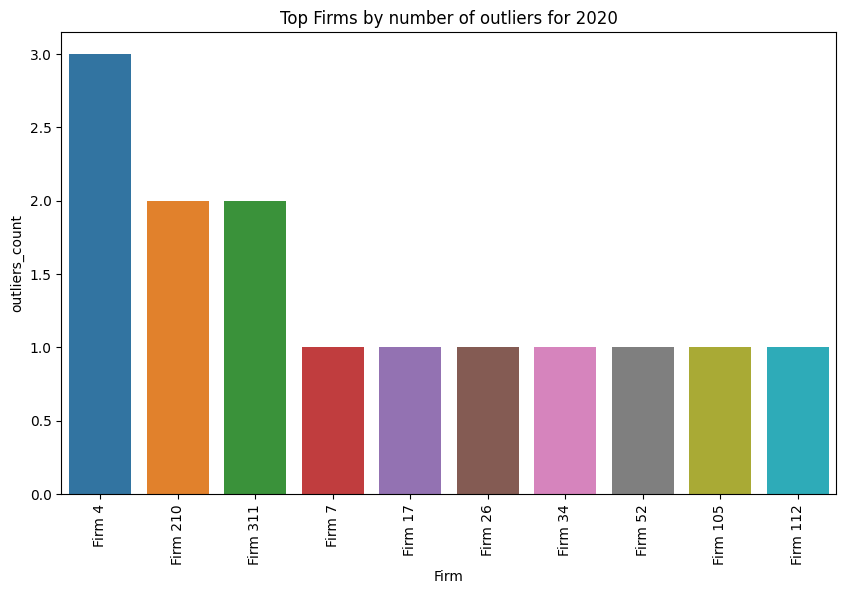

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Firm',y='outliers_count',data = outlier_data, hue='Firm');
plt.title("Top Firms by number of outliers for 2020")
plt.xticks(rotation=90);

### We can see that there are not that many error values

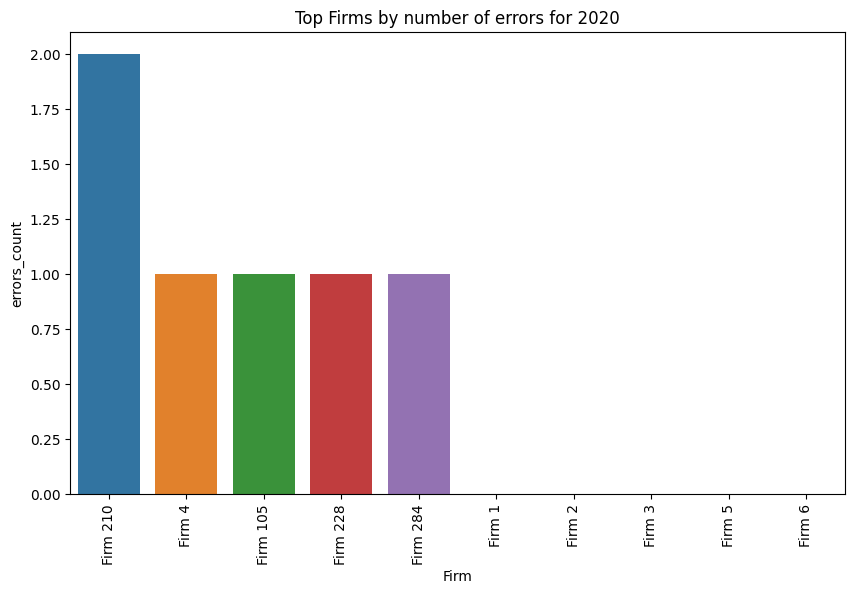

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Firm',y='errors_count',data = errors_data, hue='Firm');
plt.title("Top Firms by number of errors for 2020")
plt.xticks(rotation=90);

## Task II

#### In order to group firms having similar characteristics, I've employed K-means clustering

In [23]:
kmeans_data = data[col2020]

In [24]:
sc = StandardScaler()
scaled_data = sc.fit_transform(kmeans_data)

In [25]:
kmeans = KMeans(n_clusters=5, random_state=123)
clusters = kmeans.fit_predict(scaled_data)

In [26]:
kmeans_data['Cluster'] = clusters
cluster_sizes = kmeans_data['Cluster'].value_counts()
cluster_sizes

Cluster
0    306
4     12
2      3
3      3
1      1
Name: count, dtype: int64

### Considering NWP shows the firm size and SCR coverage ratio shows risk, visualising the clusters with NWP vs SCR coverage ratio shows how the risk varies with firm size.

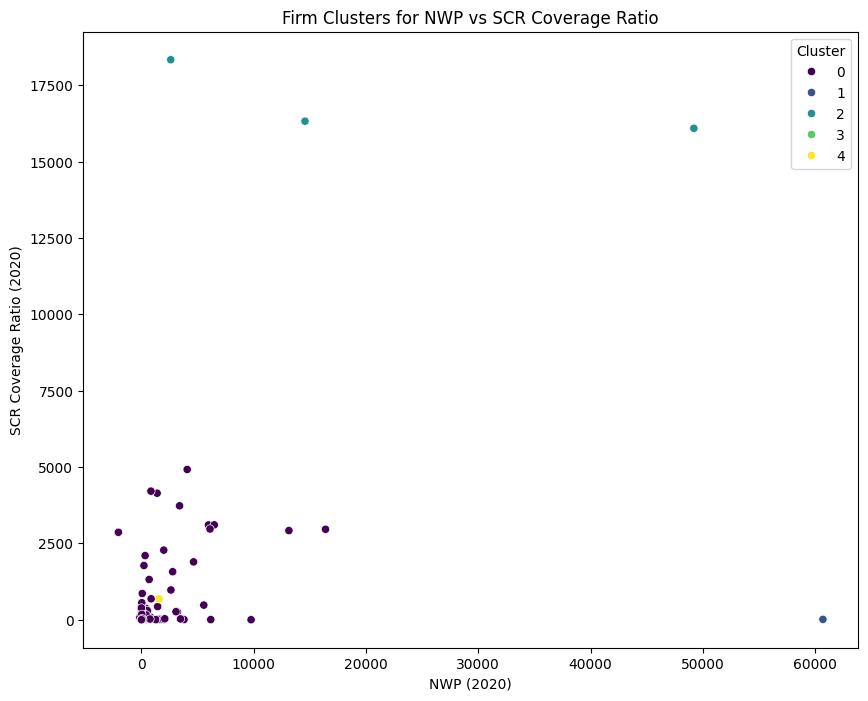

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='NWP (£m)  2020YE', y='SCR (£m) 2020YE', data=kmeans_data, hue='Cluster', palette='viridis')
plt.title('Firm Clusters for NWP vs SCR Coverage Ratio')
plt.xlabel('NWP (2020)')
plt.ylabel('SCR Coverage Ratio (2020)')
plt.legend(title='Cluster')
plt.show()

### **Insights**

#### - Cluster 0: Contains medium-sized firms with medium SCR Coverage Ratio and moderate to low NWP values.
#### - Cluster 1: Contains the biggest firms by NWP. We can see that Firm 210 is notably large but with a low SCR Coverage Ratio.
#### - Cluster 2: Could contain outliers as seen in the analysis above Firm 4, which is a part of this cluster has soime outliers.
#### - Cluster 3: Contains firms having inconsistent or zero values of some metrics
#### - Cluster 4: Contains small firms having Net combined ratio close to or greater than 100% indicating loss

### Depending upon the requirement related to the considered metrics, the firms falling in that corresponding cluster could be taken care of.


## Task III

- **Azure Data Factory(ADF):** Can be used for automated data transformation.
- **Azure Databricks:** Can be used for ML tasks and analysis using Spark.
- **Azure Data Lake:** Can be used for storing the data.
- **Azure Analysis Services:** Can be used to model data on cloud.
- **Azure Power BI:** Can be used for visualization and carry out data insights using dashboards.
- **Azure Monitor:** Can be used to track the performance of the pipeline.
- **Azure Security Center:** Can be used to keep the pipeline safe.

### Using the above tools provided by Azure, following can be taken care of:
- Security
- Scalability
- Cost
- Automation